In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [42]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [43]:
df = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'Additional_charges']]

In [44]:
df.isna().any()

Children              False
Age                   False
Income                False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
Initial_days          False
Additional_charges    False
dtype: bool

In [45]:
df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,Initial_days,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,34.455299,12934.528587
std,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,26.309341,6542.601544
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,1.001981,3125.703000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,7.896215,7986.487755
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,35.836244,11573.977735
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,61.161020,15626.490000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,71.981490,30566.070000


In [46]:
df.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,Initial_days,Additional_charges
0,1,53,86575.93,19.141466,6,0,10.585770,17939.403420
1,3,51,46805.99,18.940352,4,2,15.129562,17612.998120
2,3,53,14370.14,18.057507,4,1,4.772177,17505.192460
3,0,78,39741.49,16.576858,4,1,1.714879,12993.437350
4,1,22,1209.56,17.439069,5,0,1.254807,3716.525786


In [47]:
#Normalize data and store it in a new variable
scaled_data = pd.DataFrame( data = whiten(obs = df, check_finite = True), columns = df.columns)
scaled_data

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,Initial_days,Additional_charges
0,0.462203,2.568140,3.035651,9.489455,5.737881,0.000000,0.402378,2.742074
1,1.386609,2.471229,1.641179,9.389752,3.825254,1.983996,0.575093,2.692183
2,1.386609,2.568140,0.503867,8.952078,3.825254,0.991998,0.181396,2.675704
3,0.000000,3.779526,1.393474,8.218041,3.825254,0.991998,0.065185,1.986073
4,0.462203,1.066020,0.042411,8.645485,4.781568,0.000000,0.047697,0.568079
...,...,...,...,...,...,...,...,...
9995,0.924406,1.211387,1.611783,8.418326,3.825254,1.983996,1.959905,1.364608
9996,1.848813,4.215626,0.525356,9.011327,4.781568,0.000000,2.610163,4.357376
9997,1.386609,2.180496,2.311306,8.491802,3.825254,1.983996,2.666646,2.335764
9998,1.386609,2.083585,1.041466,9.870672,4.781568,1.983996,2.408273,1.189445


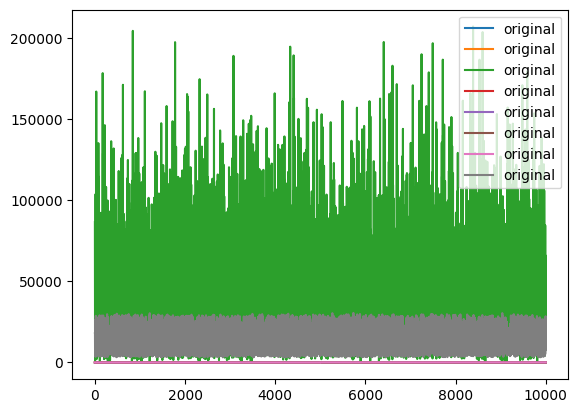

In [48]:
#Plot original data
plt.plot(df, label='original')
plt.legend()
plt.show()


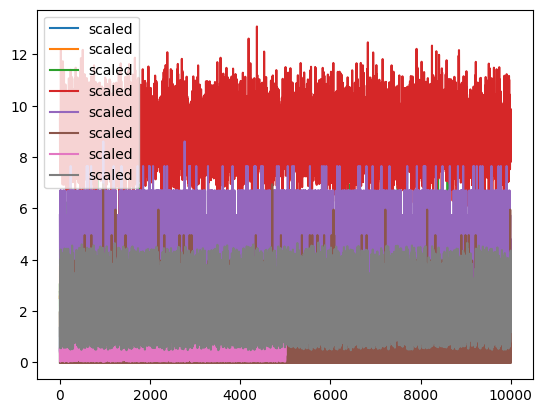

In [49]:
# Plot scaled data
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

In [50]:
#Sanity check to make sure the standard deviation is the same, aka the data is normalized
for i in scaled_data.columns:
    print([i, scaled_data[i].std()])

['Children', 1.0000500037503124]
['Age', 1.0000500037503124]
['Income', 1.0000500037503124]
['VitD_levels', 1.0000500037503124]
['Doc_visits', 1.0000500037503124]
['Full_meals_eaten', 1.0000500037503126]
['Initial_days', 1.0000500037503124]
['Additional_charges', 1.0000500037503124]


In [51]:
scaled_data.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,Initial_days,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.969332,2.592934,1.419736,8.905851,4.793235,0.993387,1.309688,1.977069
std,1.000050,1.000050,1.000050,1.000050,1.000050,1.000050,1.000050,1.000050
min,0.000000,0.872198,0.005403,4.861601,0.956314,0.000000,0.038087,0.477770
25%,0.000000,1.744397,0.687201,8.242621,3.825254,0.000000,0.300145,1.220751
50%,0.462203,2.568140,1.184037,8.899338,4.781568,0.991998,1.362179,1.769106
75%,1.386609,3.440338,1.903819,9.591826,5.737881,1.983996,2.324805,2.388541
max,4.622031,4.312537,7.266868,13.085149,8.606822,6.943986,2.736104,4.672086


In [52]:
scaled_data.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d212_data_mining_ii/scaled_data.csv')

In [53]:
# Compute cluster centers
kmeans_whiten = kmeans(obs = scaled_data, k_or_guess = 3, iter = 20, check_finite = True)
kmeans_whiten

(array([[0.91187868, 1.62639173, 1.45002638, 8.88547498, 4.79566458,
         0.96935617, 1.27302015, 1.16459101],
        [0.98831587, 3.30334677, 1.38994603, 8.93691575, 4.80922827,
         1.03328758, 0.34338677, 2.58377219],
        [1.03281082, 3.28616167, 1.40522344, 8.90505246, 4.77445757,
         0.98931608, 2.28761518, 2.55066817]]),
 2.403353941313717)

In [54]:
# Generate cluster centers and labels
centroid_numeric, label_numeric = kmeans_whiten
code_numeric, dist_numeric = vq( obs = scaled_data, code_book = centroid_numeric, check_finite = True)
print(code_numeric)
print(dist_numeric)

[1 1 1 ... 2 0 2]
[2.40615593 1.7483505  1.57769959 ... 2.10229742 1.97257158 3.08592583]


In [55]:
# Find 5 clusters in the data
code_book, distortion = kmeans(scaled_data, 3)
print(code_book)


[[0.9890528  3.62674695 1.41415067 8.90797075 4.82695389 1.03741617
  1.29474433 2.97831933]
 [0.9236841  1.99262508 1.44137339 8.90260814 4.77618844 0.9718481
  0.34241769 1.40294038]
 [0.99277444 2.03913494 1.40443803 8.9067175  4.77265241 0.9657955
  2.28818109 1.43348104]]


In [56]:
#Convert the codebook array to a dataframe for visualization
df_codebook = pd.DataFrame(code_book, columns = ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'Additional_charges'])
print(df_codebook)

   Children       Age    Income  VitD_levels  Doc_visits  Full_meals_eaten  \
0  0.989053  3.626747  1.414151     8.907971    4.826954          1.037416   
1  0.923684  1.992625  1.441373     8.902608    4.776188          0.971848   
2  0.992774  2.039135  1.404438     8.906718    4.772652          0.965796   

   Initial_days  Additional_charges  
0      1.294744            2.978319  
1      0.342418            1.402940  
2      2.288181            1.433481  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


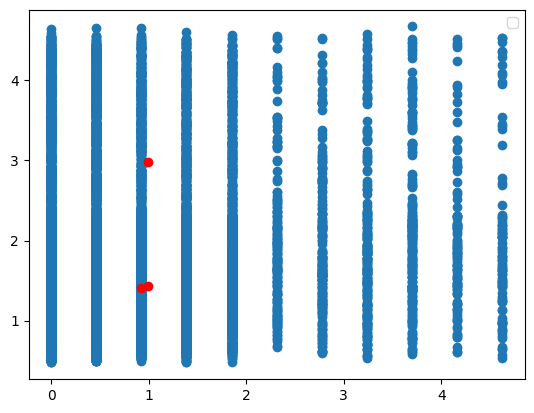

In [62]:
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 7])
plt.scatter(df_codebook.iloc[:, 0], df_codebook.iloc[:, 7], c='r')
plt.legend()
plt.show()


In [58]:
#Elbow method: Declaring variables for use
distortions = []
num_cluster = range(1, 10)

In [59]:
#Populating distortions for various clusters
for i in num_cluster:
    centoids, distortion = kmeans(scaled_data, i)
    distortions.append(distortion)

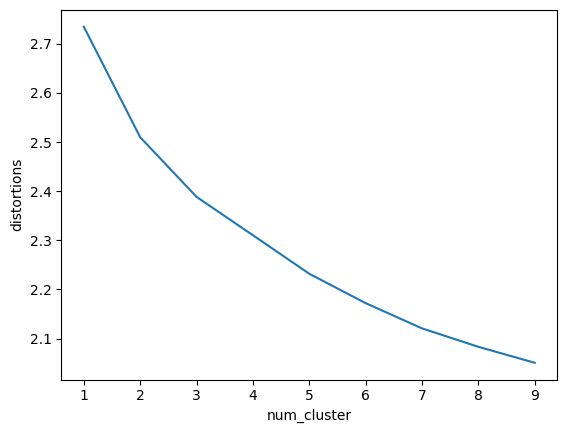

In [60]:
#Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_cluster': num_cluster, 'distortions': distortions})
sns.lineplot(x = 'num_cluster', y = 'distortions', data = elbow_plot_data)
plt.show()